## Bayesian Statistics Walkthrough

### Introduction
- Bayesian statistics is a branch of statistics that allows us to directly estimate some parameter of interest with a distribution.
    - In this case, we'll say our parameter of interest is the percentage of votes the Democratic candidate earns:
    $$p_D$$
    
- Rather than saying "the Democrat will win 53% of the vote ($p_D = 0.53$)," we can estimate the percentage of votes the Democrat will get with a distribution. This is beneficial because we can directly account for uncertainty in our forecasts. (i.e. The Democrat is likely to win 53%, but it's reasonable that they win between 48% and 58% of the vote.)
- Bayesian inference is also beneficial because we can combine our data (likelihood) with our prior beliefs about the parameter of interest.

## Terms:

A **distribution** is the set of all possible values of a variable and how frequently we observe each of the values.

Our **prior distribution** summarizes our prior beliefs about $p_D$.

Our **likelihood** is how our data summarize the parameter of interest.

Our **posterior distribution** is the combination of the data we've observed (a.k.a. our likelihood) and our prior beliefs (a.k.a. our prior distribution).
- Intuitively, I think of the posterior distribution as a sort of compromise between our prior distribution and our likelihood.

## Let's put this into action!

In [1]:
# Import the necessary packages:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

%matplotlib inline

### Suppose I live in a district where I strongly believe the Democrat is going to lose... badly. Then, I want a prior distribution that reflects these beliefs.
- It's common for us to use a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) when modeling probabilities, because the Beta distribution is bound between 0 and 1.

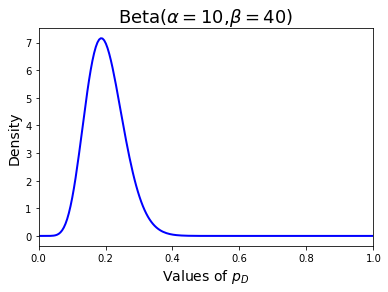

In [2]:
# Define our alpha and beta parameters:
a = 10
b = 40

# Generate 200 x values in the appropriate
# range to use for plotting:
x = np.linspace(0, 1, 200)

plt.plot(x, beta(a,b).pdf(x),
        'b-', lw=2, alpha=1)

# Plot customization:
plt.ylabel('Density', fontsize = 14)
plt.xlim((0,1))
plt.xlabel('Values of $p_D$', fontsize = 14)
plt.title(r'Beta($\alpha=10$,$\beta=40$)', fontsize = 18);

### Suppose I live in a district where I think the Democrat will win, but I'm not so certain. Then, I want a prior distribution that reflects these beliefs.

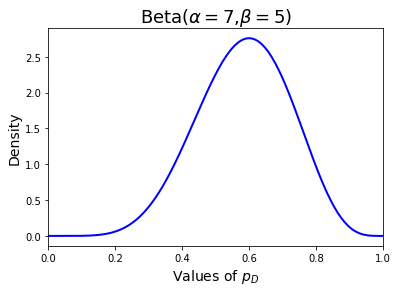

In [3]:
# Define our alpha and beta parameters:
a = 7
b = 5

# Generate 200 x values in the appropriate
# range to use for plotting:
x = np.linspace(0, 1, 200)

plt.plot(x, beta(a,b).pdf(x),
        'b-', lw=2, alpha=1)

# Plot customization:
plt.ylabel('Density', fontsize = 14)
plt.xlim((0,1))
plt.xlabel('Values of $p_D$', fontsize = 14)
plt.title(r'Beta($\alpha=7$,$\beta=5$)', fontsize = 18);

### Suppose I live in a district where I know nothing about either candidate, so literally any value between 0% and 100% for $p_D$ seems reasonable. Then, I want a prior distribution that reflects these beliefs.

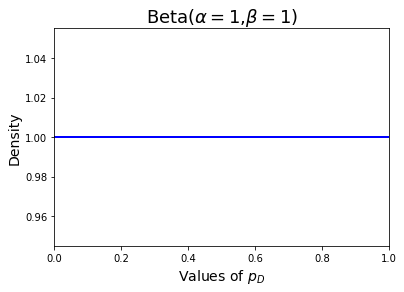

In [4]:
# Define our alpha and beta parameters:
a = 1
b = 1

# Generate 200 x values in the appropriate
# range to use for plotting:
x = np.linspace(0, 1, 200)

plt.plot(x, beta(a,b).pdf(x),
        'b-', lw=2, alpha=1)

# Plot customization:
plt.ylabel('Density', fontsize = 14)
plt.xlim((0,1))
plt.xlabel('Values of $p_D$', fontsize = 14)
plt.title(r'Beta($\alpha=1$,$\beta=1$)', fontsize = 18);

## How do I combine this with our data?

Remember that our posterior distribution is a combination of our prior and our likelihood (data)!

The **likelihood function** should be a reasonable model for how the data are generated.

If I administer a survey to $n$ people and ask, "Do you plan to vote for the Democratic candidate?," a reasonable model for counting up how many people support the Democratic candidate is the [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution).

### Suppose I get responses from 40 people in my survey, and 30 people say they plan to support the Democrat.

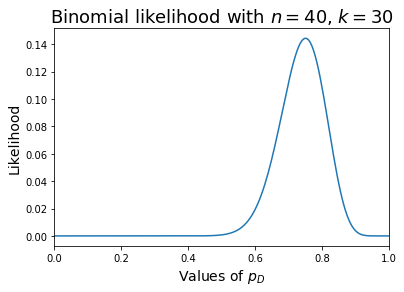

In [5]:
from scipy.stats import binom

x = np.linspace(0,1,200) 
y = [binom(n=40, p=i).pmf(30) for i in x]

plt.plot(x,y)

plt.ylabel('Likelihood', fontsize = 14)
plt.xlim((0,1))
plt.xlabel('Values of $p_D$', fontsize = 14)
plt.title(r'Binomial likelihood with $n=40$, $k=30$', fontsize = 18);

Note that my likelihood isn't dependent on my prior. **My likelihood only depends on my data!**

### Suppose I get responses from 400 people in my survey, and 300 people say they plan to support the Democrat.

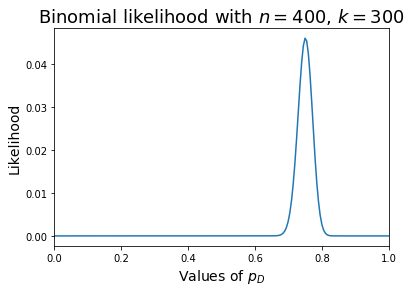

In [6]:
from scipy.stats import binom

x = np.linspace(0,1,200) 
y = [binom(n=400, p=i).pmf(300) for i in x]

plt.plot(x,y)

plt.ylabel('Likelihood', fontsize = 14)
plt.xlim((0,1))
plt.xlabel('Values of $p_D$', fontsize = 14)
plt.title(r'Binomial likelihood with $n=400$, $k=300$', fontsize = 18);

## Let's look at a prior and likelihood together.
- Suppose I think the Democrat will win, but I'm not so certain. I'll use my $Beta(7,5)$ as my prior.
- Suppose I administer a survey to 400 people and get 300 people supporting the Democrat. I'll use my $Binomial(400, 300)$ as my likelihood.

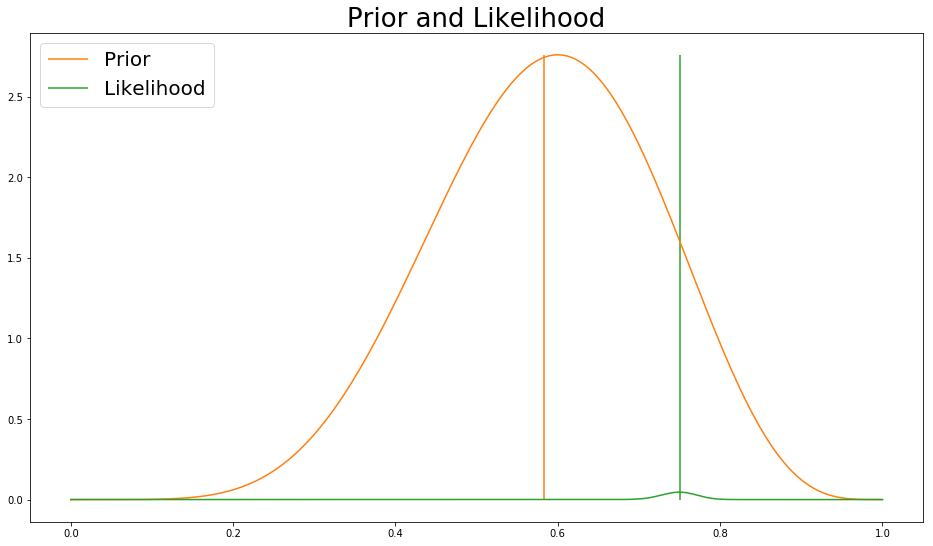

In [7]:
plt.figure(figsize = (16,9))

## We want to vary p from 0 to 1.
lst = np.linspace(0,1,200)

## Set up prior.
a = 7
b = 5
prior = [beta(a,b).pdf(i) for i in lst]
plt.vlines(a / (a + b), ymin = 0, ymax = max(prior), color = 'tab:orange', label='Prior')

## Set up likelihood.
n = 400
k = 300
likelihood = [binom(n,i).pmf(k) for i in lst]
plt.vlines(300 / 400, ymin = 0, ymax = max(prior), color = 'tab:green', label = 'Likelihood')

## Plot prior and likelihood.
plt.title("Prior and Likelihood", fontsize = 26)
plt.legend(loc = 'upper left', fontsize = 20)
plt.plot(lst, prior, c = 'tab:orange');
plt.plot(lst, likelihood, c = 'tab:green');

### Now, let's visualize our posterior distribution and posterior mean. Any thoughts on where the posterior mean might fall? Why?

In [8]:
def plot_beta_binomial(a, b, n_trials, n_successes, n_steps = 200):
    plt.figure(figsize = (16, 9))
    
    lst = np.linspace(0, 1, n_steps)
    
    ## Calculating prior, likelihood, and posterior.
    prior = [beta(a, b).pdf(i) for i in lst]
    likelihood = [binom(n_trials,i).pmf(k = n_successes) for i in lst]
    posterior = np.multiply(prior, likelihood)
    
    ## Plotting colored lines here to show prior mean, the maximum likelihood value, and posterior mean.
    plt.vlines([a / (a + b), n_successes / n_trials, (a + n_successes) / (a + b + n_trials)],
               ymin = 0,
               ymax = max(max(prior),max(likelihood), max(posterior)), # height of dotted lines
               linestyles = 'dashed',
               colors = ['tab:orange', 'tab:green', 'tab:blue'])
    
    ## Plotting prior, likelihood, and posterior.
    plt.title("Prior, Likelihood, and Posterior", fontsize = 26)
    plt.plot(lst, prior, c = 'tab:orange', label = 'Prior');
    plt.plot(lst, likelihood, c = 'tab:green', label = 'Likelihood');
    plt.plot(lst, posterior, c = 'tab:blue', label = 'Posterior');
    plt.legend(loc = 'upper right', fontsize = 20)

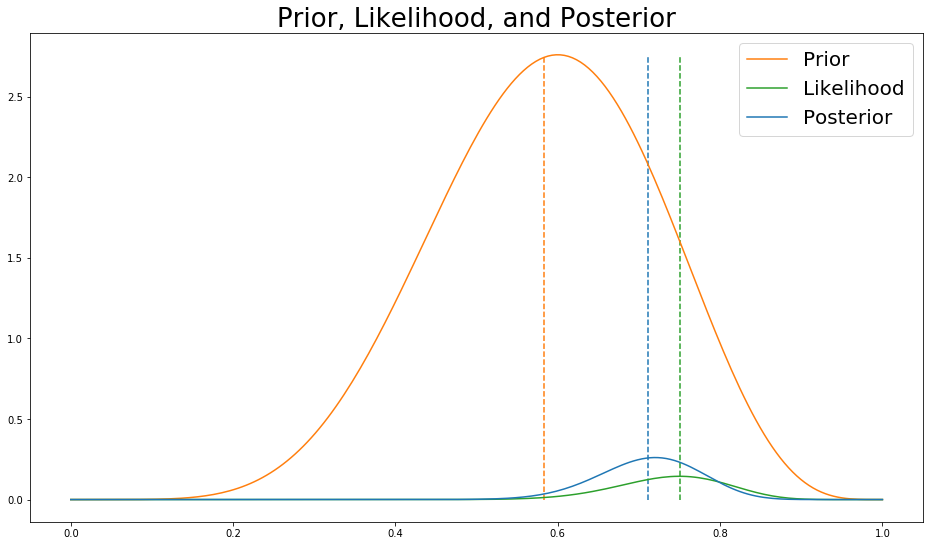

In [9]:
plot_beta_binomial(a = 7,            # Hyperparameter alpha for Beta(alpha, beta)
                   b = 5,            # Hyperparameter beta for Beta(alpha, beta)
                   n_trials = 40,    # Hyperparameter n for Binomial(n, k)
                   n_successes = 30) # Hyperparameter k for Binomial(n, k)

### Suppose you had thought the Democrat was going to perform really poorly, but you do a survey that shows the Democrat actually has 55% support in a survey of 100 people.

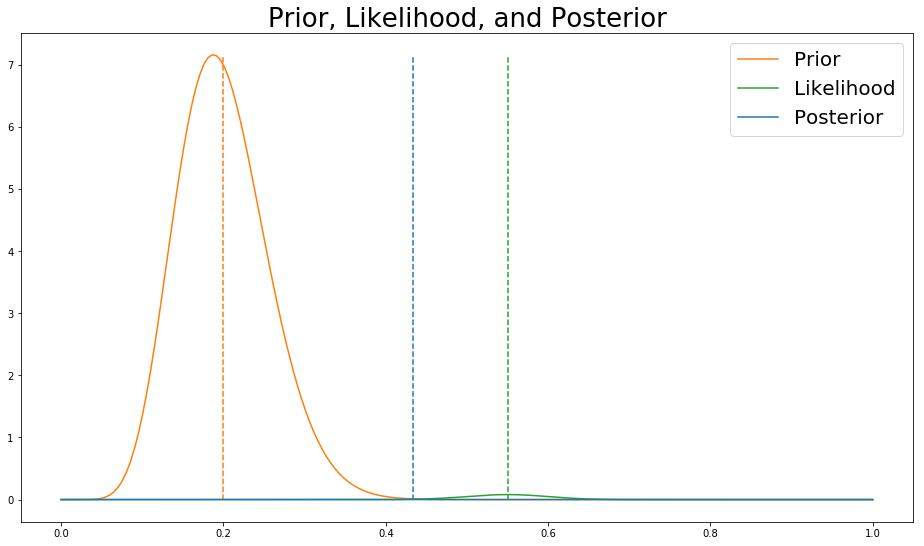

In [10]:
plot_beta_binomial(a = 10,              # Hyperparameter alpha for Beta(alpha, beta)
                   b = 40,              # Hyperparameter beta for Beta(alpha, beta)
                   n_trials = 100,      # Hyperparameter n for Binomial(n, k)
                   n_successes = 55)   # Hyperparameter k for Binomial(n, k)

## How does this get turned into election predictions?
We can use Bayesian inference to generate forecasts for how much support the Democrat should expect to get at the polls.

- If I pull one value $p_D$ from this posterior distribution, I can see if it's above 50%. If it's above 50%, then the Democrat won this one simulated election.
- If I pull 100,000 values from this posterior distribution, I can simulate 100,000 elections.
- If I simulated 100,000 elections and the Democrat won 60% of them, then it's reasonable for me to say that I expect the Democrat to have about a 60% chance of winning the election.
    - Note: This is different than me saying I expect the Democrat to win 60% of the vote. We used simulations to turn how much of the vote the Democrat gets into how likely the Democrat is to win.
    
Mathematically, if I have a $Beta(\alpha, \beta)$ prior distribution and a $Binomial(n,k)$ likelihood, [then I will have](https://www4.stat.ncsu.edu/~reich/st590/code/BetaBinom) a $Beta\big(\alpha + k, \beta + (n-k)\big)$ posterior.

In [11]:
# Set a random seed so we all get the same answers.
np.random.seed(42)

# Beta(7, 5)
# Binomial(40, 30)

# Generate 100,000 observations from the posterior distribution.
p_d = np.random.beta(7 + 30,5 + (40-30), 100000)

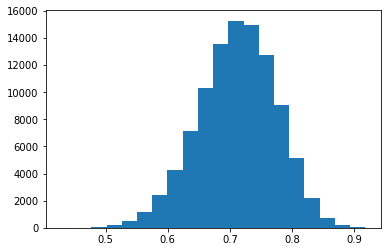

In [12]:
# Plot a histogram of the simulated posterior distribution of p_d.
plt.hist(p_d, bins = 20);

In [13]:
# Use the values of p_d to simulate 100,000 elections.
elections = [1 if i > 0.5 else 0 for i in p_d]

In [14]:
# How many elections did we win?
np.mean(elections)

0.99925

0.05111

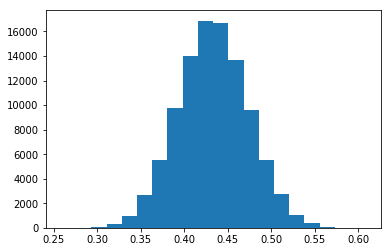

In [15]:
# Set a random seed so we all get the same answers.
np.random.seed(42)

# Beta(10, 40)
# Binomial(100, 55)

# Generate 100,000 observations from the posterior distribution.
p_d = np.random.beta(10 + 55, 40 + (100-55), 100000)

# Plot a histogram of the simulated posterior distribution of p_d.
plt.hist(p_d, bins = 20);

# Use the values of p_d to simulate 100,000 elections.
elections = [1 if i > 0.5 else 0 for i in p_d]

# How many elections did we win?
np.mean(elections)

## We can do this for all Senate elections to forecast how likely it is that one party takes control of the Senate, or for all states to forecast how likely it is that a person wins the Electoral College, and so on.
- This type of random number generation to model complex systems is known as [Monte Carlo simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method).